<h1>Iris with outliers EDA and Classification Analysis</h1>
</code>
<img style="display: block;-webkit-user-select: none;margin: auto;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://t4.ftcdn.net/jpg/08/68/82/65/360_F_868826574_cFsv8j9N1GsauGtCoXtkXXBgHfLXlOdP.jpg">

## Introduction ##
**about Iris normal dataset:**
The *Iris dataset* is a widely used and well-known dataset in the field of machine learning and statistics, originally introduced by British statistician Ronald A. Fisher in 1936. It contains 150 samples of iris flowers from three species: *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica*, with 50 samples for each species. Each sample is described by four numerical features: *sepal length*, *sepal width*, *petal length*, and *petal width*, all measured in centimeters. The dataset is often used as a benchmark for classification tasks because of its simplicity, balanced classes, and clear distinctions between species. While the Iris-setosa species is linearly separable from the other two, Iris-versicolor and Iris-virginica exhibit some overlap, making it a good dataset to explore classification algorithms and techniques like k-Nearest Neighbors (k-NN), support vector machines (SVM), and decision trees. Its small size and simplicity make it ideal for teaching, visualization, and testing exploratory data analysis methods.

[original dataset link](https://www.kaggle.com/datasets/uciml/iris)

**However, in this study, a different version of the Iris dataset has been used, which contains more outlier values compared to the original dataset.**
>**about Iris dataset with outliers:**

The provided dataset, derived from the classic Iris dataset, appears to contain some modifications and additional records, including **173 entries** instead of the original 150. The dataset includes the following columns:

1. **Unnamed: 0**: Likely an indexing column from the original data source.
2. **Id**: A unique identifier for each sample.
3. **SepalLengthCm**: The sepal length in centimeters.
4. **SepalWidthCm**: The sepal width in centimeters.
5. **PetalLengthCm**: The petal length in centimeters.
6. **PetalWidthCm**: The petal width in centimeters.
7. **Species**: The species of the iris flower (e.g., Iris-setosa, Iris-versicolor, Iris-virginica).

Notable differences from the original Iris dataset include:
- The presence of additional rows, suggesting added data or possibly outliers.
- Missing values in some of the feature columns (e.g., SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm).
- Potential anomalies or outliers given the expanded record count.

This dataset can be used to explore how outliers and missing data impact analysis and modeling, offering opportunities for data cleaning, imputation, and advanced exploratory data analysis.

In [83]:
# import data manipulation library
import pandas as pd

# import array manipulation library
import numpy as np

# import data visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio  


# Import sklearn PowerTransformer preprocessing
from sklearn.preprocessing import PowerTransformer

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# notebook setting
%matplotlib inline
sns.set()

## Exploring Data ##

In [84]:
df = pd.read_csv("/kaggle/input/iris-dataset-with-outliers/Iris_with_outliers.csv")
df

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...,...
168,168,168,6.8,3.0,5.5,2.1,Iris-virginica
169,169,169,6.4,2.7,5.3,1.9,Iris-virginica
170,170,170,7.2,3.6,6.1,2.5,Iris-virginica
171,171,171,6.3,3.3,6.0,2.5,Iris-virginica


In [85]:
df = df.drop(labels=["Id","Unnamed: 0"], axis=1)

In [86]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...
168,6.8,3.0,5.5,2.1,Iris-virginica
169,6.4,2.7,5.3,1.9,Iris-virginica
170,7.2,3.6,6.1,2.5,Iris-virginica
171,6.3,3.3,6.0,2.5,Iris-virginica


In [87]:
# rename column names
# Dict = {"old_col_name": "new_col_name"}
Dict = {
    "SepalLengthCm" : "sepal_length",       # rename the 1st feature
    "SepalWidthCm"  : "sepal_width",        # rename the 2nd feature
    "PetalLengthCm" : "petal_length",       # rename the 3rd feature
    "PetalWidthCm"  : "petal_width",        # rename the 4th feature
    "Species": "species"                    # rename the target class label
}

df = df.rename(columns=Dict)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  170 non-null    float64
 1   sepal_width   172 non-null    float64
 2   petal_length  169 non-null    float64
 3   petal_width   171 non-null    float64
 4   species       173 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [89]:
df.isnull().sum()

sepal_length    3
sepal_width     1
petal_length    4
petal_width     2
species         0
dtype: int64

In [90]:
# filling missing values with stategy 'mean'
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_sans_miss_vals = df.copy()
for feature in features: 
    mean = df_sans_miss_vals[feature].mean()
    df_sans_miss_vals.fillna(value=mean, inplace=True)

In [91]:
df_sans_miss_vals.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [92]:
# is there duplicate rows?
df_sans_miss_vals.duplicated().sum()


12

In [93]:
# create a dataframe with duplicate rows
df_with_duplicates = df_sans_miss_vals.copy()

In [94]:
# drop duplicates
df_sans_duplicates = df_with_duplicates.drop_duplicates()

In [95]:
df_with_duplicates.shape, df_sans_duplicates.shape

((173, 5), (161, 5))

In [96]:
# remove the prefix 'Iris-' from the 'Iris-setosa' specy
df_sans_duplicates = df_sans_duplicates.replace("Iris-setosa", "setosa")
df_sans_duplicates = df_sans_duplicates.replace("Iris-versicolor", "versicolor")
df_sans_duplicates = df_sans_duplicates.replace("Iris-virginica", "virginica")
df_sans_duplicates

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.7,3.2,1.6,0.2,setosa
2,4.9,3.1,1.5,0.1,setosa
3,4.4,2.9,1.4,0.2,setosa
4,5.0,3.4,1.5,0.2,setosa
...,...,...,...,...,...
168,6.8,3.0,5.5,2.1,virginica
169,6.4,2.7,5.3,1.9,virginica
170,7.2,3.6,6.1,2.5,virginica
171,6.3,3.3,6.0,2.5,virginica


In [101]:
#looking for negetive or zero values

# fetch the rows that has zero or negative length
df_sans_duplicates.query(expr='sepal_length<=0')
#no bad value found!

,sepal_length,sepal_width,petal_length,petal_width,species


In [102]:
# fetch the rows that has zero or negative Width
df_sans_duplicates.query(expr='sepal_width<=0')
#no bad value found!

,sepal_length,sepal_width,petal_length,petal_width,species


In [103]:
# fetch the rows that has zero or negative length
df_sans_duplicates.query(expr='petal_length<=0')
#no bad value found!

,sepal_length,sepal_width,petal_length,petal_width,species


In [104]:
# fetch the rows that has zero or negative Width
df_sans_duplicates.query(expr='petal_width<=0')
#no bad value found!

,sepal_length,sepal_width,petal_length,petal_width,species


## Exploratory Data Analysis (EDA) ##
EDA is a crucial step in the data analysis process that involves investigating datasets to summarize their main characteristics, often using visual and statistical techniques. The primary goal of EDA is to understand the structure of the data, detect patterns, identify anomalies or outliers, and test initial hypotheses. By examining relationships between variables and visualizing distributions, EDA provides insights into the dataset that guide subsequent modeling or decision-making. Common EDA methods include generating summary statistics, plotting histograms, boxplots, scatterplots, and using correlation matrices. This step helps ensure data quality, highlights potential issues such as missing values or skewness, and allows analysts to make informed decisions about feature selection, transformations, and modeling approaches. Ultimately, EDA forms the foundation for extracting meaningful insights and creating robust data-driven solutions.
## Univariate Analysis ##
focuses on examining a single variable in a dataset to understand its distribution, central tendency, and variability. The primary goal is to summarize and describe the key characteristics of that variable without considering its relationships with other variables. This analysis can be performed on both numerical and categorical data. For numerical data, common methods include calculating summary statistics such as the mean, median, standard deviation, and creating visualizations like histograms, boxplots, or density plots. For categorical data, frequency tables and bar plots are often used to display the distribution of categories. Univariate analysis helps identify outliers, skewness, and other patterns in the data, which can guide data cleaning, transformations, and initial insights into the dataset's structure. It serves as a foundation for more complex analyses by providing a detailed understanding of individual variables.

In [105]:
df=df_sans_duplicates.copy()

In [106]:
def feature_stats(df):
    numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
    for feature in numeric_features:
        feature_data = df[feature]
        feature_mean = feature_data.mean()
        feature_median = feature_data.median()
        feature_std = feature_data.std()
        feature_mode=feature_data.mode()[0]
        feature_count = feature_data.count()
        
        print(f"Feature: {feature}")
        print(f"Mean: {feature_mean:.2f}")
        print(f"Median: {feature_median:.2f}")
        print(f"Standard Deviation: {feature_std:.2f}")
        print(f"Count: {feature_count}")
        print(f"The most common value: {feature_mode}")
        print()
feature_stats(df)

Feature: sepal_length
Mean: 5.84
Median: 5.80
Standard Deviation: 0.84
Count: 161
The most common value: 5.0

Feature: sepal_width
Mean: 3.08
Median: 3.00
Standard Deviation: 0.50
Count: 161
The most common value: 3.0

Feature: petal_length
Mean: 3.78
Median: 4.40
Standard Deviation: 1.77
Count: 161
The most common value: 1.5

Feature: petal_width
Mean: 1.23
Median: 1.30
Standard Deviation: 0.91
Count: 161
The most common value: 0.2



In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,161.0,5.841630,0.837423,4.3,5.1,5.8,6.4,8.000000
sepal_width,161.0,3.082821,0.497480,2.0,2.8,3.0,3.4,5.834118
petal_length,161.0,3.780972,1.771215,1.0,1.6,4.4,5.1,6.900000
petal_width,161.0,1.227753,0.913051,0.1,0.3,1.3,1.8,5.834118


## Numerical Features ##
**Boxplots of Numerical Columns :**

Observation :
From below figure Visualization , we Can See that all features Contains Some Outliers.

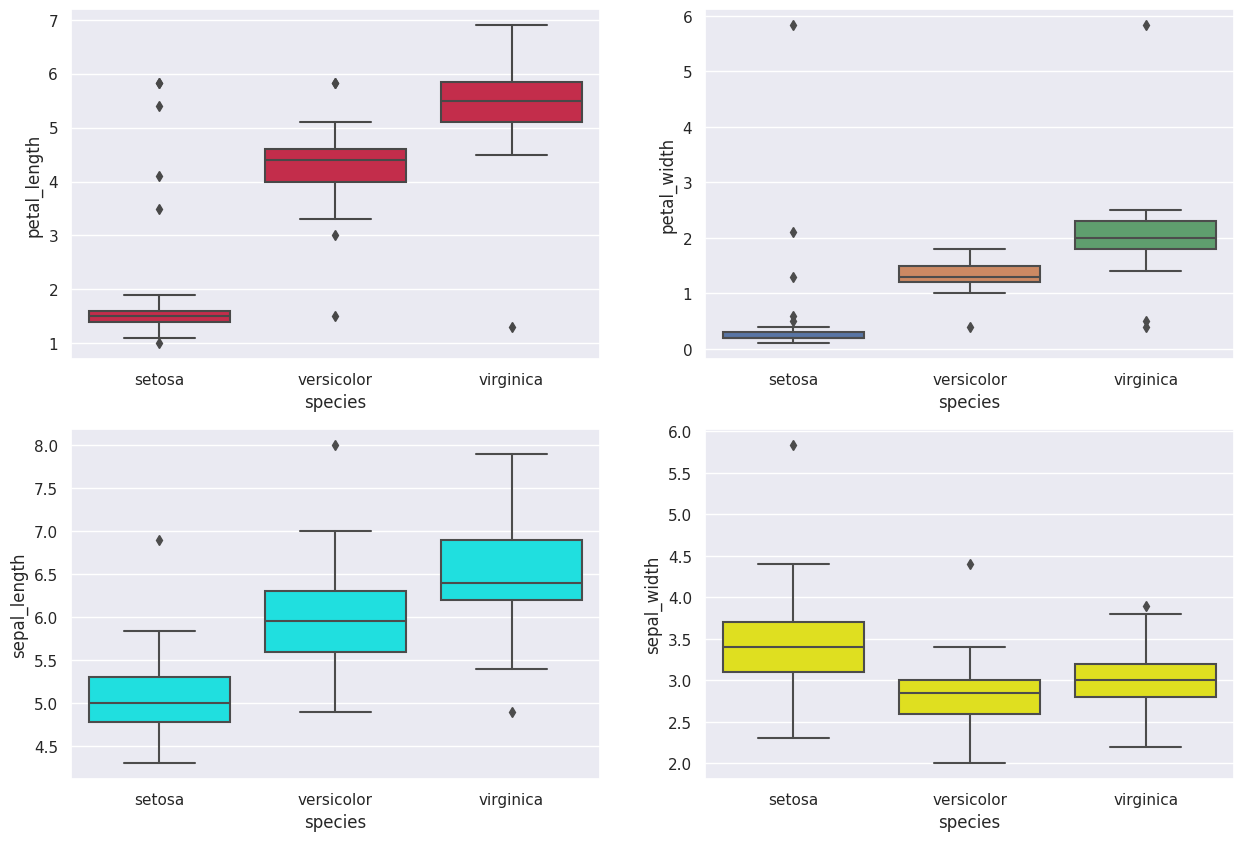

In [111]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='petal_length',data=df,color='crimson')

plt.subplot(2,2,2)
sns.boxplot(x='species',y='petal_width',data=df)

plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal_length',data=df,color='cyan')

plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal_width',data=df,color='yellow');



In [112]:
#*Boxplots of Numerical Columns :*
df_species = df['species'].value_counts()
df_species = pd.DataFrame(df_species)
df_species.T 

species,setosa,versicolor,virginica
count,56,54,51


In [113]:
# Reset index from 'species' to the range(0, 7, 1)
df_species.reset_index(inplace=True)
df_species

,species,count
0,setosa,56
1,versicolor,54
2,virginica,51


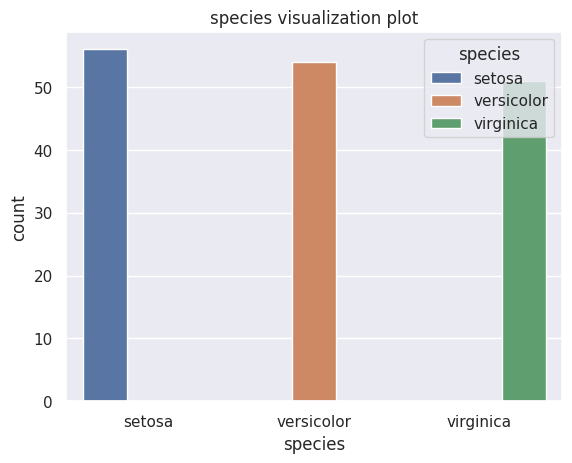

In [115]:
# plotly.express barplot for fish species
plt.title('species visualization plot')
sns.barplot(
    x='species',           
    y='count',
    data=df_species,
    hue='species'       
);

## Bivariate Analysis ##

examines the relationship between two variables in a dataset to understand how they are associated or influence each other. It is a key step in exploratory data analysis (EDA) that helps identify patterns, trends, and potential correlations. The type of analysis depends on the nature of the variables. For two numerical variables, scatterplots, correlation coefficients (e.g., Pearson or Spearman), and regression lines are commonly used to assess linear or non-linear relationships. For a numerical and a categorical variable, boxplots, violin plots, or bar charts help compare distributions across categories. When both variables are categorical, contingency tables and chi-square tests are employed to examine associations. Bivariate analysis provides deeper insights into the dataset by highlighting interactions and dependencies, which can inform feature selection and model development in predictive analytics.

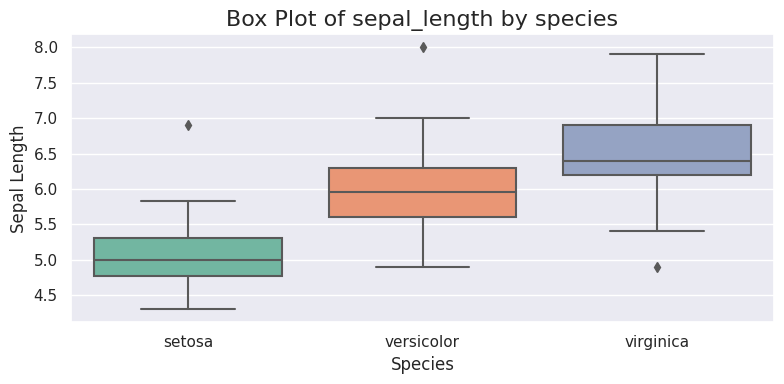

In [118]:
#SepalLength vs Species

# Create a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="species", y="sepal_length", palette="Set2")

# Update plot titles and labels
plt.title("Box Plot of sepal_length by species", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Sepal Length", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#Observation:

#From the below figure visualization, it is evident that the species Virginica exhibits a higher average value of Sepal Length (SepalLengthCm) compared to the other species. Conversely, the Setosa species demonstrates a lower average value of Sepal Length.

#Maximum value of Sepal Length Of Setosa Species is 6.9cm and Lower value of Setosa Species is 4.3cm.

#Maximum value of Sepal Lenght of Versicolor Species is 8cm and lower values of 4.9.

#Max value of Sepal Length of Virginica Species is 7.9cm and Lower value of 4.9.


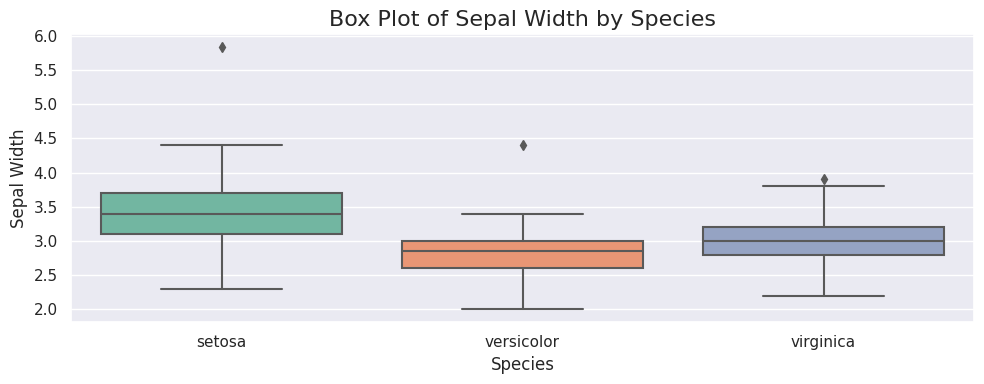

In [119]:
#SepalWidth vs Species

# Create a box plot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x="species", y="sepal_width", palette="Set2")

# Update plot titles and labels
plt.title("Box Plot of Sepal Width by Species", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Sepal Width", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#Observation:

#From the visualization, it is evident that the species Setosa exhibits a higher average value of Sepal Width (sepal_width) compared to the other species. Conversely, the Versicolor species demonstrates a lower average value of Sepal Width.

#Max Value Of Sepal Width Of Species Setosa is 5.83cm and lower average value of Sepal Width is 2.3cm.

#Max Value Of Sepal Width Of Species Versicolor is 4.4cm and lower values is 2cm.

#Max Value Of Sepal Width Of Species Virginica is 3.9cm and Lower value is 2.2cm.


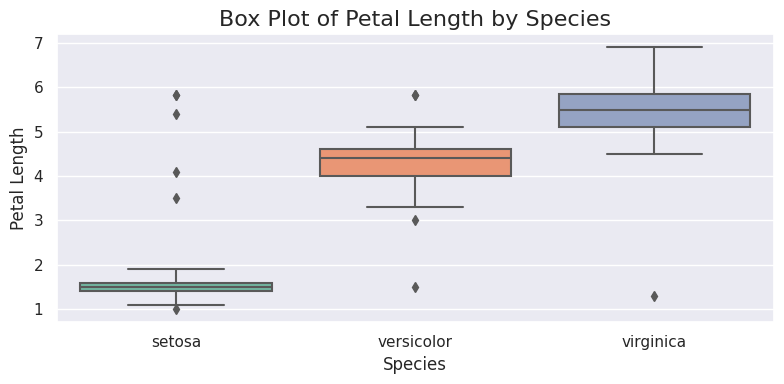

In [120]:
#PetalLengthCm vs Species

# Create a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="species", y="petal_length", palette="Set2")

# Update plot titles and labels
plt.title("Box Plot of Petal Length by Species", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Petal Length", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#Observation:

#From the visualization in the figure below, it is evident that the species Virginica exhibits a higher average value of Petal Length(Petal_length) compared to the other species. Conversely, the Setosa species demonstrates a lower average value of Petal Length.

#Max value of Petal Length of Setosa Species 5.83 cm and lower average value of Setosa is 1cm.

#Max Value of Petal Length of Versicolore Species 5.83cm and lower average value o Versicolor 1.5cm.

#Max Value Of Petal Lenght of Virginica species is 6.9 and lower average value of virginica is 1.3cm.


***PetalWidth vs Species***

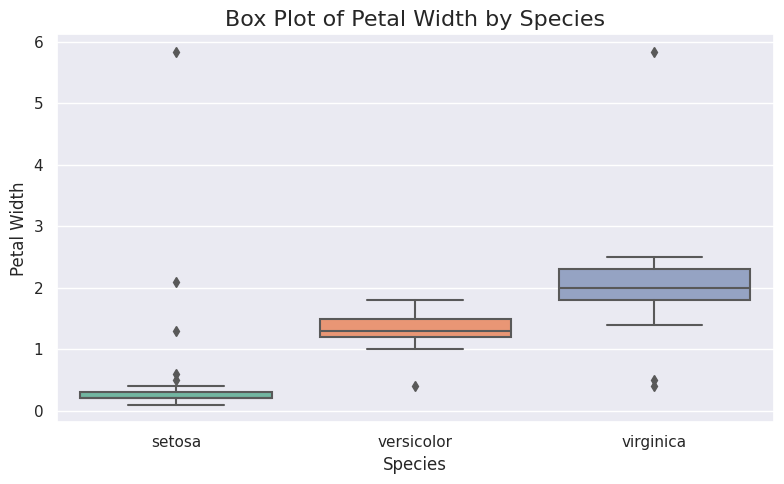

In [121]:
#PetalWidth vs Species

# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="species", y="petal_width", palette="Set2")

# Update plot titles and labels
plt.title("Box Plot of Petal Width by Species", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Petal Width", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#Observation:

#From the visualization, it is evident that the species Virginica exhibits a higher average value of Petal Width (PetalWidthCm) compared to the other species. Conversely, the Setosa species demonstrates a lower average value of Petal Width.

#Max value of Petal Length of Setosa Species is 5.83cm and lower average value of Setosa is 0.1cm.

#Max Value of Petal Length of Versicolor Species is 1.8cm and lower average value of Versicolor is 0.4 cm.

#Max Value Of Petal Lenght of Virginica Species is 5.83cm lower average values of Virginica is 0.4cm.

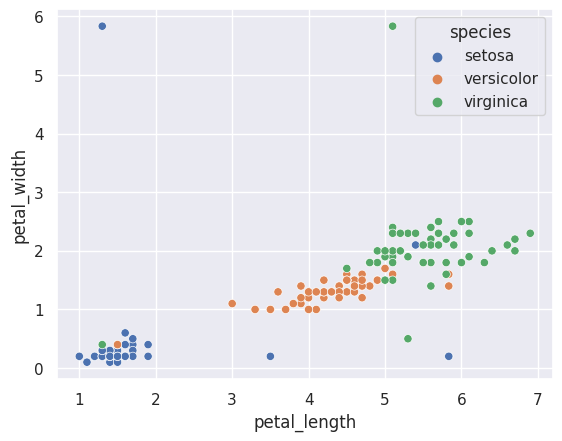

In [122]:
#How the length and width vary according to the species
#Scatter Plot with Iris Dataset (Relationship between Petal Length and Petal Width):

sns.scatterplot(
    data=df_sans_duplicates, 
    x='petal_length',
    y='petal_width',
    hue='species'
);

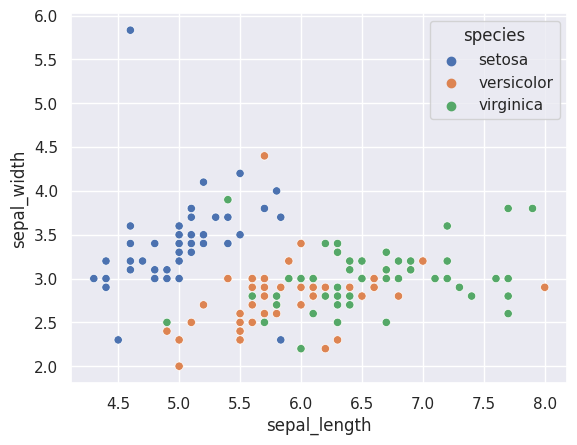

In [123]:
#Scatter Plot with Iris Dataset (Relationship between Sepal Length and SepalWidth):
sns.scatterplot(
    data=df_sans_duplicates, 
    x='sepal_length',
    y='sepal_width',
    hue='species'
);

### Observations from the Scatter Plots:
#### 1. **Plot 1: Petal Length vs. Petal Width**
- There is a clear clustering of the three species:
  - **Setosa (blue)**: Distinctly grouped with low petal length and width values, showing minimal overlap with the other species.
  - **Versicolor (orange)**: Positioned in the middle, with moderate petal length and width values. There is some overlap with Virginica.
  - **Virginica (green)**: Located towards the higher end of petal length and width, indicating larger flowers compared to the other species.
#### 2. **Plot 2: Sepal Length vs. Sepal Width**
- The species clusters are less distinct compared to the first plot:
  - **Setosa (blue)**: Still forms a relatively separate cluster, with higher sepal width compared to the other species.
  - **Versicolor (orange)** and **Virginica (green)** show considerable overlap, making it harder to differentiate between them based on sepal length and width.
- There are some outliers, particularly a point with a very high sepal width, which deviates significantly from the main clusters.
### Overall Observations:
- **Petal dimensions (length and width)** provide better separation between species compared to **sepal dimensions.**
- Outliers are evident in both plots and need further investigation to determine their nature and impact on the dataset.
- These visualizations highlight the importance of petal features in distinguishing between the Iris species.

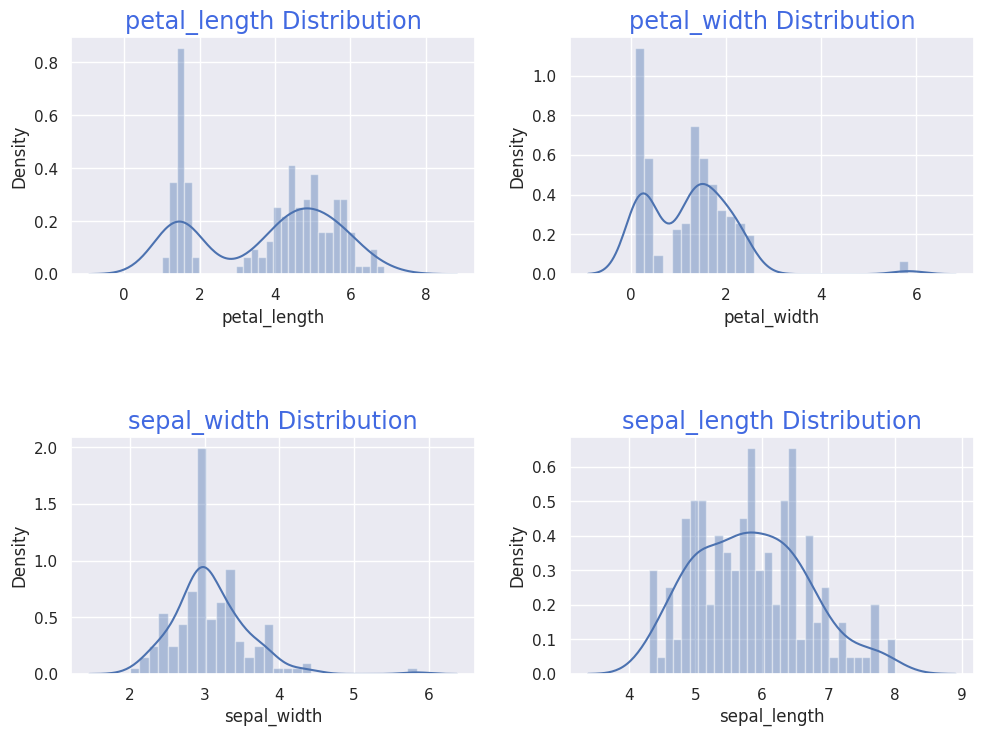

In [124]:
#Numerical Features Distribution

sns.set_theme()
sns.set_theme(style="darkgrid")

plt.figure(figsize=[10, 15])
plt.subplot(4, 2, 1) 
sns.distplot(df_sans_duplicates.petal_length, bins=30)
plt.title("petal_length Distribution",color='royalblue',size='x-large',family='times new roman')


plt.subplot(4, 2, 2) 
sns.distplot(df_sans_duplicates.petal_width, bins=30)
plt.title("petal_width Distribution",color='royalblue',size='x-large',family='times new roman')


plt.subplot(4, 2, 3) 
sns.distplot(df_sans_duplicates.sepal_width, bins=30)
plt.title("sepal_width Distribution",color='royalblue',size='x-large',family='times new roman')


plt.subplot(4, 2, 4) 
sns.distplot(df_sans_duplicates.sepal_length, bins=30)
plt.title("sepal_length Distribution",color='royalblue',size='x-large',family='times new roman')


plt.tight_layout(h_pad=5, w_pad=2)
plt.show()

Based on the visualizations provided, we can interpret the distributions as follows:
1. Petal Length Distribution:
The distribution appears bimodal, with two distinct peaks.
This suggests the presence of two clusters of values ,corresponding to different species.
**This is not normally distributed due to the bimodal shape.**
2. Petal Width Distribution:
Similar to petal length, this distribution is also bimodal, with two peaks.
**The data is clearly skewed and not symmetric, indicating it is not normally distributed.**
3. Sepal Width Distribution:
The distribution appears closer to normal than the others but is slightly skewed to the right (positive skew).
**While not perfectly normal, it is relatively more symmetric compared to the petal features. Statistical testing would confirm its normality.**
4. Sepal Length Distribution:
This distribution appears fairly symmetric and unimodal.
**It looks closer to a normal distribution compared to the others, though there may still be slight deviations.**

Summary:
Closest to normal: Sepal Length and Sepal Width (with Sepal Length being the most normal-looking).
Not normal: Petal Length and Petal Width due to their bimodal shapes and skewness.
Next Steps:
To confirm normality, apply a statistical test (e.g., Shapiro-Wilk test or Anderson-Darling test) to these features.

In [125]:
df=df_sans_duplicates.copy()

from scipy.stats import kstest
for col in df.iloc[:,[0,1,2,3]]:
    standardized_age = (df[col] - df[col].mean()) / df[col].std()
    stat, p = kstest(standardized_age, 'norm')
    print(f'Kolmogorov-Smirnov Test Statistic for {col}:', stat)
    print(f'p-value for {col}:', p)
    if p > 0.05:
        print(f'The {col} data is normally distributed (fail to reject H0)')
    else:
        print(f'The {col} data is not normally distributed (reject H0)')
print('**************************************')

from scipy.stats import anderson
for col in df.iloc[:,[0,1,2,3]]:
    result = anderson(df[col])
    print(f"{col}: statistic = {result.statistic}, critical values = {result.critical_values}")
    if result.statistic < result.critical_values[2]:  # Usually 5% significance level
        print(f"{col} is likely normal.")
    else:
        print(f"{col} is not normal.")


Kolmogorov-Smirnov Test Statistic for sepal_length: 0.0791665534295175
p-value for sepal_length: 0.2516407975216257
The sepal_length data is normally distributed (fail to reject H0)
Kolmogorov-Smirnov Test Statistic for sepal_width: 0.1251166527447023
p-value for sepal_width: 0.011773258203533865
The sepal_width data is not normally distributed (reject H0)
Kolmogorov-Smirnov Test Statistic for petal_length: 0.19674962807474378
p-value for petal_length: 6.167673386048192e-06
The petal_length data is not normally distributed (reject H0)
Kolmogorov-Smirnov Test Statistic for petal_width: 0.14687772454410414
p-value for petal_width: 0.0017021223040015782
The petal_width data is not normally distributed (reject H0)
**************************************
sepal_length: statistic = 0.7135615660335191, critical values = [0.563 0.641 0.769 0.897 1.067]
sepal_length is likely normal.
sepal_width: statistic = 1.9082304758943565, critical values = [0.563 0.641 0.769 0.897 1.067]
sepal_width is not 

*Based on the results of the Kolmogorov-Smirnov (KS) test and the Anderson-Darling test, here's the summary of the normality of the features:*

**Summary of Normality:**

sepal_length: Likely normal (supported by both tests).

sepal_width: Not normal (supported by both tests).

petal_length: Not normal (supported by both tests).

petal_width: Not normal (supported by both tests).

***Insights:***

1: sepal_width appears "closer to normal" based on the visual inspection of its distribution.However, based on the statistical test results (Kolmogorov-Smirnov and Anderson-Darling tests), **sepal_width is conclusively not normal.**

2: Sepal length is the only feature that resembles a normal distribution, confirmed by both tests.
The other features (sepal_width, petal_length, and petal_width) are not normally distributed, possibly due to skewness or multimodality in their distributions.

**Next Steps:**

for the feature is not normally distributed,should have transform by taking logarith (np.log) in order to normalize it if needed for a model.

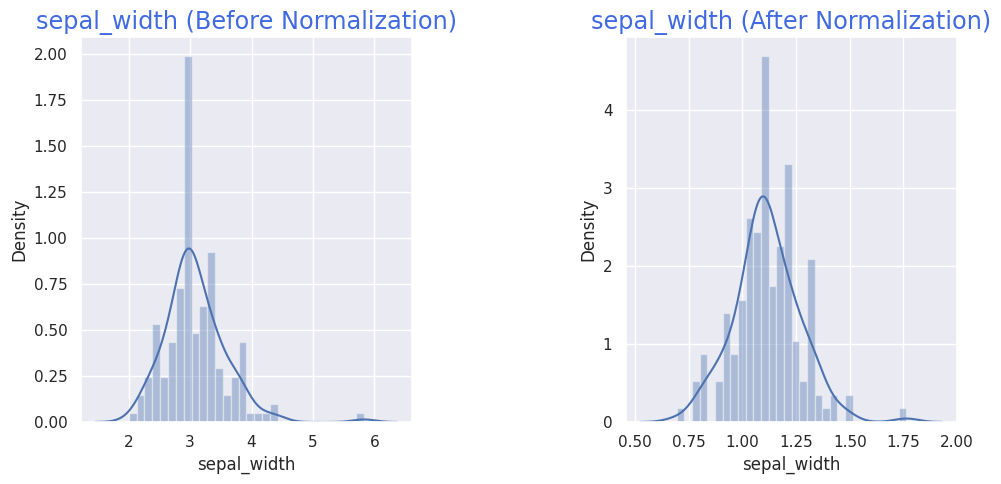

In [126]:
sep_adj=np.log(df.sepal_width)

plt.figure(figsize=[10, 5])

plt.subplot(1,2,1)
sns.distplot(df.sepal_width, bins=30)
plt.title("sepal_width (Before Normalization)",color='royalblue',size='x-large',family='times new roman')

plt.subplot(1,2,2)
sns.distplot(sep_adj, bins=30)
plt.title("sepal_width (After Normalization)",color='royalblue',size='x-large',family='times new roman')

plt.tight_layout(w_pad=10,h_pad=10)
plt.show()


In [128]:
sep=pd.DataFrame(sep_adj)

col='sepal_width'

standardized_age = (sep[col] - sep[col].mean()) / sep[col].std()
stat, p = kstest(standardized_age, 'norm')
print(f'Kolmogorov-Smirnov Test Statistic for {col}:', stat)
print(f'p-value for {col}:', p)
if p > 0.05:
    print(f'The {col} data is normally distributed (fail to reject H0)')
else:
    print(f'The {col} data is not normally distributed (reject H0)')

Kolmogorov-Smirnov Test Statistic for sepal_width: 0.09808481518863044
p-value for sepal_width: 0.08435996621341657
The sepal_width data is normally distributed (fail to reject H0)


In [129]:
#Whole data farme Transformation:
for col in df.iloc[:,[0,1,2,3]]:
    df[col] = np.log(df[col] + 1)
    

## Outlier Detection ##

In [130]:
def outlier_detection(dataframe):
    """
    Find the outliers in the given dataframe. 
    To get the index for the outliers, please input single column of a dataframe.

    Input Parameters
    ----------------
    dataframe : A dataframe that we want to detect outliers for each feature (single column).

    Output
    -----------------
    outliers : A Python list of tuples instance as the outliers of the dataframe.
    Items of the outliers list is as [(feature_name, outlier_indexes, outlier_values)]
    """
    
    # Will contain the outliers as [(feature_name, outlier_indexes, outlier_values)]
    outliers = []
    
    for feature_name in dataframe.columns:
        
        # Get data for the feature_name
        data = dataframe[feature_name]
    
        # Compute 1st and 3rd quartiles
        q1 = data.quantile(q=0.25)
        q3 = data.quantile(q=0.75)

        # Compute Inter Quartile Range
        IQR = q3 - q1

        # Compute lower and upper fences to determine outliers
        lower_fence = q1 - 1.5 * IQR 
        upper_fence = q3 + 1.5 * IQR

        # Outlier condition
        #outlier_condition = (data < lower_fence) | (data > upper_fence)
        outlier_condition = data.lt(lower_fence) | data.gt(upper_fence)

        # Filter outliers
        outlier = data[outlier_condition]

        # Append the outlier info to the outliers list
        outlier_info = (feature_name, outlier.index.tolist(), outlier.values.tolist())
        outliers.append(outlier_info)
    
    # Return outliers information
    return outliers

In [131]:
numericals = df.drop(labels='species', axis=1)
for feature_name, outlier_indexes, outlier_values in outlier_detection(numericals):
    print(f'{feature_name = }')
    print(f'{outlier_indexes = }')
    print(f'{outlier_values = }')
    print()

feature_name = 'sepal_length'
outlier_indexes = []
outlier_values = []

feature_name = 'sepal_width'
outlier_indexes = [53, 90]
outlier_values = [1.9219273685081701, 1.0986122886681098]

feature_name = 'petal_length'
outlier_indexes = []
outlier_values = []

feature_name = 'petal_width'
outlier_indexes = []
outlier_values = []



In [132]:

df.query(expr='index in [53,90]')

,sepal_length,sepal_width,petal_length,petal_width,species
53,1.722767,1.921927,0.875469,0.262364,setosa
90,1.791759,1.098612,1.504077,0.693147,versicolor


In [134]:
outlier_list=[]

Outlier detection for the "setosa" Speccy:

feature_name = 'sepal_length'
outlier_indexes = [14]
outlier_values = [2.066862759472976]

feature_name = 'sepal_width'
outlier_indexes = [41, 53, 59]
outlier_values = [1.1939224684724346, 1.9219273685081701, 1.1939224684724346]

feature_name = 'petal_length'
outlier_indexes = [12, 14, 22, 27, 50, 52, 60]
outlier_values = [0.7419373447293773, 1.8562979903656263, 0.6931471805599453, 1.62924053973028, 1.9219273685081701, 1.9219273685081701, 1.5040773967762742]

feature_name = 'petal_width'
outlier_indexes = [14, 19, 27, 43, 54]
outlier_values = [1.1314021114911006, 0.4054651081081644, 0.8329091229351039, 0.47000362924573563, 1.9219273685081701]



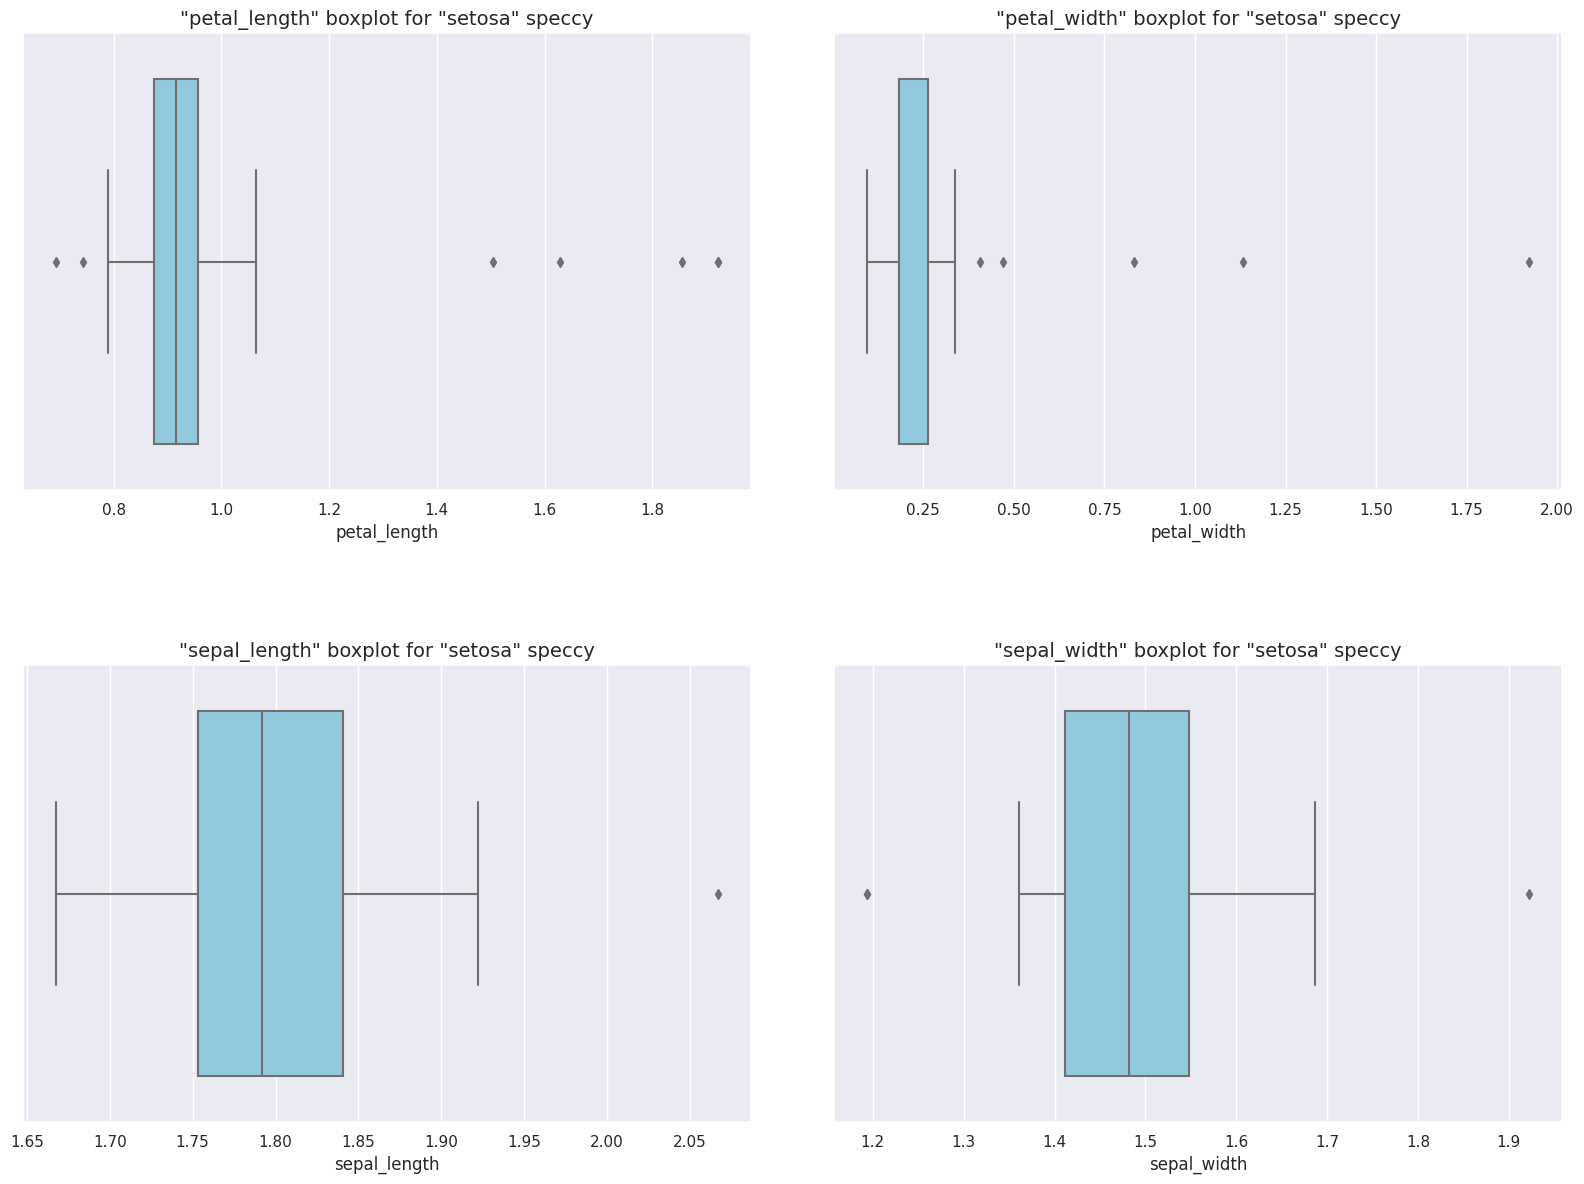

In [135]:
df_setosa = df.query(expr='species == "setosa"')
numericals_setosa = df_setosa.drop(labels='species', axis=1)

print('Outlier detection for the "setosa" Speccy:\n')
for feature_name, outlier_indexes, outlier_values in outlier_detection(numericals_setosa):
    print(f'{feature_name = }')
    print(f'{outlier_indexes = }')
    print(f'{outlier_values = }')
    print()
    outlier_list.extend(outlier_indexes)

# Plot boxplots for each feature
features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
titles = [
    '"petal_length" boxplot for "setosa" speccy',
    '"petal_width" boxplot for "setosa" speccy',
    '"sepal_length" boxplot for "setosa" speccy',
    '"sepal_width" boxplot for "setosa" speccy'
]

# Create individual box plots
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_setosa, x=feature, color="skyblue")
    plt.title(titles[i - 1], fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.tight_layout(h_pad=6,w_pad=5)

# Show the plots
plt.show()


Outlier detection for the "versicolor" Speccy:

feature_name = 'sepal_length'
outlier_indexes = [115]
outlier_values = [2.1972245773362196]

feature_name = 'sepal_width'
outlier_indexes = [90, 91]
outlier_values = [1.0986122886681098, 1.6863989535702288]

feature_name = 'petal_length'
outlier_indexes = [91, 99, 103, 114]
outlier_values = [0.9162907318741551, 1.9219273685081701, 1.3862943611198906, 1.9219273685081701]

feature_name = 'petal_width'
outlier_indexes = [91]
outlier_values = [0.3364722366212129]



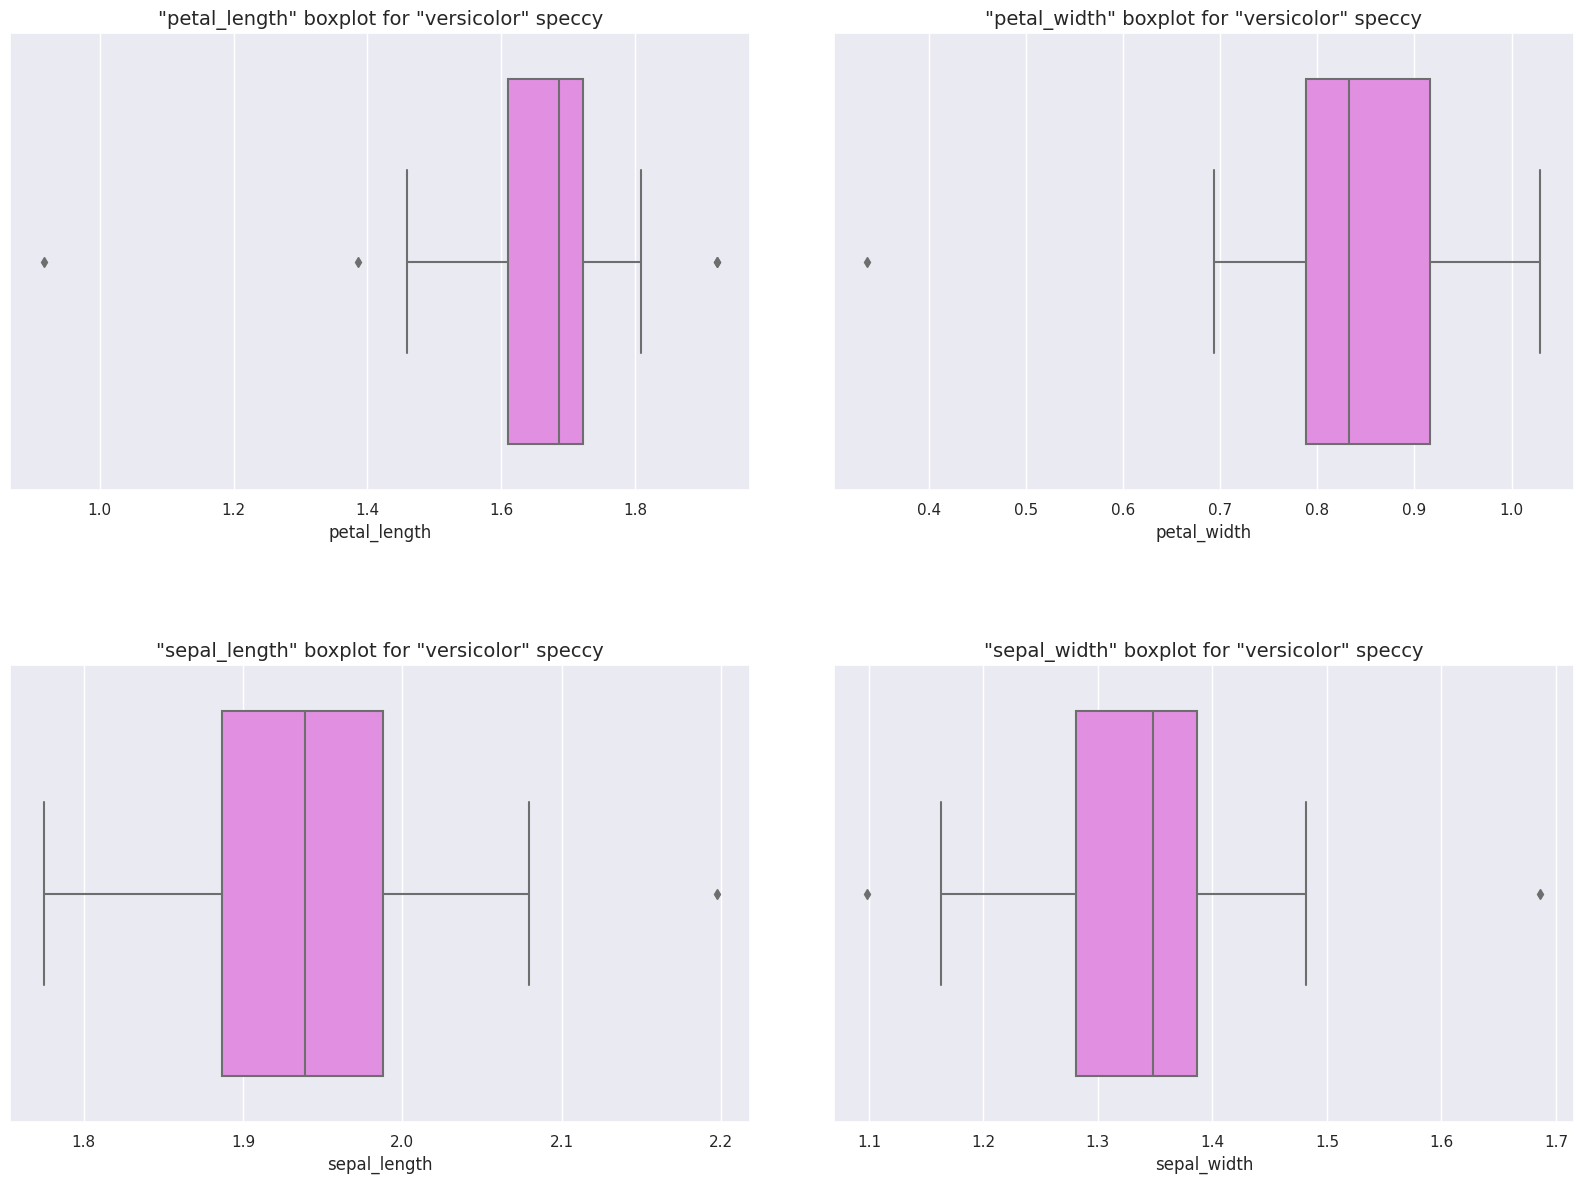

In [136]:
df_versicolor = df.query(expr='species == "versicolor"')
numericals_versicolor = df_versicolor.drop(labels='species', axis=1)
    
print('Outlier detection for the "versicolor" Speccy:\n')
for feature_name, outlier_indexes, outlier_values in outlier_detection(numericals_versicolor):
    print(f'{feature_name = }')
    print(f'{outlier_indexes = }')
    print(f'{outlier_values = }')
    print()
    outlier_list.extend(outlier_indexes)


features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
titles = [
    '"petal_length" boxplot for "versicolor" speccy',
    '"petal_width" boxplot for "versicolor" speccy',
    '"sepal_length" boxplot for "versicolor" speccy',
    '"sepal_width" boxplot for "versicolor" speccy'
]

# Create individual box plots
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_versicolor, x=feature, color="violet")
    plt.title(titles[i - 1], fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.tight_layout(h_pad=6,w_pad=5)

# Show the plots
plt.show()

Outlier detection for the "virginica" Speccy:

feature_name = 'sepal_length'
outlier_indexes = [119]
outlier_values = [1.7749523509116738]

feature_name = 'sepal_width'
outlier_indexes = [139, 146]
outlier_values = [1.1631508098056809, 1.589235205116581]

feature_name = 'petal_length'
outlier_indexes = [146]
outlier_values = [0.8329091229351039]

feature_name = 'petal_width'
outlier_indexes = [146, 162, 172]
outlier_values = [0.3364722366212129, 1.9219273685081701, 0.4054651081081644]



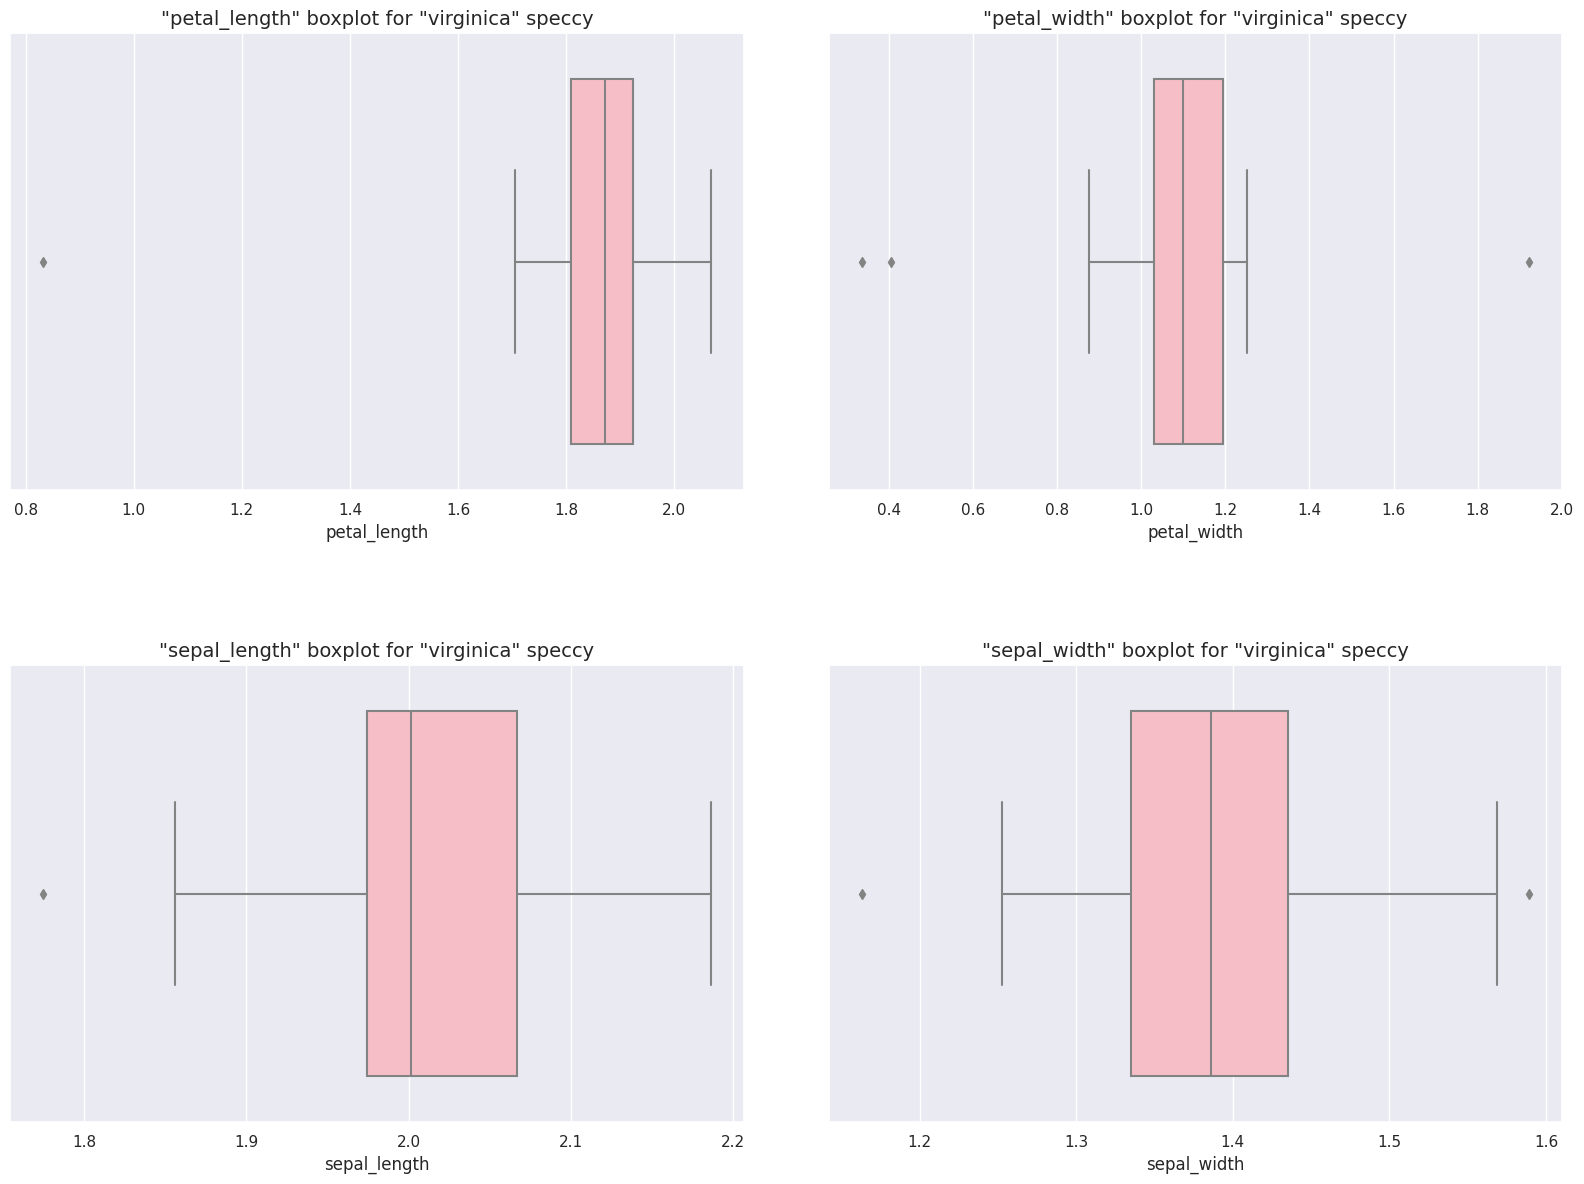

In [137]:
df_virginica = df.query(expr='species == "virginica"')
numericals_virginica = df_virginica.drop(labels='species', axis=1)
    
print('Outlier detection for the "virginica" Speccy:\n')
for feature_name, outlier_indexes, outlier_values in outlier_detection(numericals_virginica):
    print(f'{feature_name = }')
    print(f'{outlier_indexes = }')
    print(f'{outlier_values = }')
    print()
    outlier_list.extend(outlier_indexes)

# Plot boxplots for each feature
features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
titles = [
    '"petal_length" boxplot for "virginica" speccy',
    '"petal_width" boxplot for "virginica" speccy',
    '"sepal_length" boxplot for "virginica" speccy',
    '"sepal_width" boxplot for "virginica" speccy'
]

# Create individual box plots
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_virginica, x=feature, color="lightpink")
    plt.title(titles[i - 1], fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.tight_layout(h_pad=6,w_pad=5)

# Show the plots
plt.show()

In [138]:
outlier_list

[14,
 41,
 53,
 59,
 12,
 14,
 22,
 27,
 50,
 52,
 60,
 14,
 19,
 27,
 43,
 54,
 115,
 90,
 91,
 91,
 99,
 103,
 114,
 91,
 119,
 139,
 146,
 146,
 146,
 162,
 172]

In [139]:
set(outlier_list)

{12,
 14,
 19,
 22,
 27,
 41,
 43,
 50,
 52,
 53,
 54,
 59,
 60,
 90,
 91,
 99,
 103,
 114,
 115,
 119,
 139,
 146,
 162,
 172}

**Isolation Forest** is a machine learning-based anomaly detection method that isolates data points by randomly selecting a feature and then randomly selecting a split value between the minimum and maximum values of that feature. The key idea is that anomalies are easier to isolate than normal points because they are fewer in number and have values that differ significantly from the majority. The algorithm builds a tree structure where the depth of the point in the tree indicates its "normality"; shorter paths correspond to anomalies. Isolation Forest is efficient, works well with high-dimensional data, and does not require the data to follow a specific distribution. It is commonly used in detecting outliers in datasets with complex or non-linear patterns. This method is particularly suitable for large datasets, as it scales well and provides robust results for identifying anomalies.

In [141]:
outlier_forest=[]

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)
df2 = iso.fit_predict(numericals_virginica)
outliers = numericals_virginica[df2== -1]
print(outliers)
outlier_forest.extend(list(outliers.index))

     sepal_length  sepal_width  petal_length  petal_width
119      1.774952     1.252763      1.704748     0.993252
141      2.186051     1.568616      2.001480     1.098612
146      1.856298     1.589235      0.832909     0.336472


In [142]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)
df2 = iso.fit_predict(numericals_versicolor)
outliers = numericals_versicolor[df2== -1]
print(outliers)
outlier_forest.extend(list(outliers.index))

     sepal_length  sepal_width  petal_length  petal_width
90       1.791759     1.098612      1.504077     0.693147
91       1.902108     1.686399      0.916291     0.336472
115      2.197225     1.360977      1.667707     0.832909


In [143]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)
df2 = iso.fit_predict(numericals_setosa)
outliers = numericals_setosa[df2== -1]
print(outliers)
outlier_forest.extend(list(outliers.index))

    sepal_length  sepal_width  petal_length  petal_width
14      2.066863     1.410987      1.856298     1.131402
27      1.887070     1.386294      1.629241     0.832909
54      1.686399     1.386294      0.832909     1.921927


In [144]:
set(outlier_forest)

{14, 27, 54, 90, 91, 115, 119, 141, 146}

In [145]:
dropped_indexes = set(outlier_list) & set(outlier_forest)
dropped_indexes

{14, 27, 54, 90, 91, 115, 119, 146}

In [146]:
df_clean = df.drop(index=dropped_indexes)
df_clean.shape

(153, 5)

In [147]:
df_clean.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
76,2.054124,1.335001,1.757858,0.875469,versicolor
72,1.902108,1.280934,1.504077,0.693147,versicolor
17,1.791759,1.386294,0.955511,0.182322,setosa
95,1.916923,1.280934,1.609438,0.788457,versicolor
155,1.987874,1.252763,1.791759,1.064711,virginica


In [148]:
data=df_clean.copy()

## IRIS Correlation Matrix ##
Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

In [149]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.149541,0.798344,0.711648
sepal_width,-0.149541,1.000000,-0.425494,-0.391293
petal_length,0.798344,-0.425494,1.000000,0.845180
petal_width,0.711648,-0.391293,0.845180,1.000000


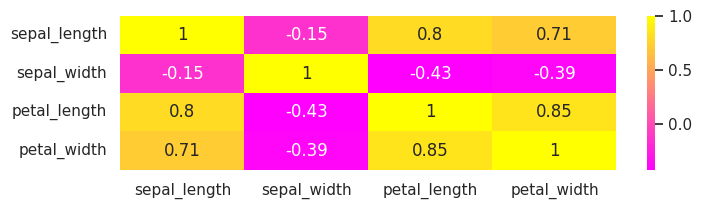

In [150]:
# seaborn heatmap and correlation matrix
plt.figure(figsize=[8, 2])
sns.heatmap(
    data=corr_matrix,
    cmap="spring",
    annot=True,
)
plt.show()

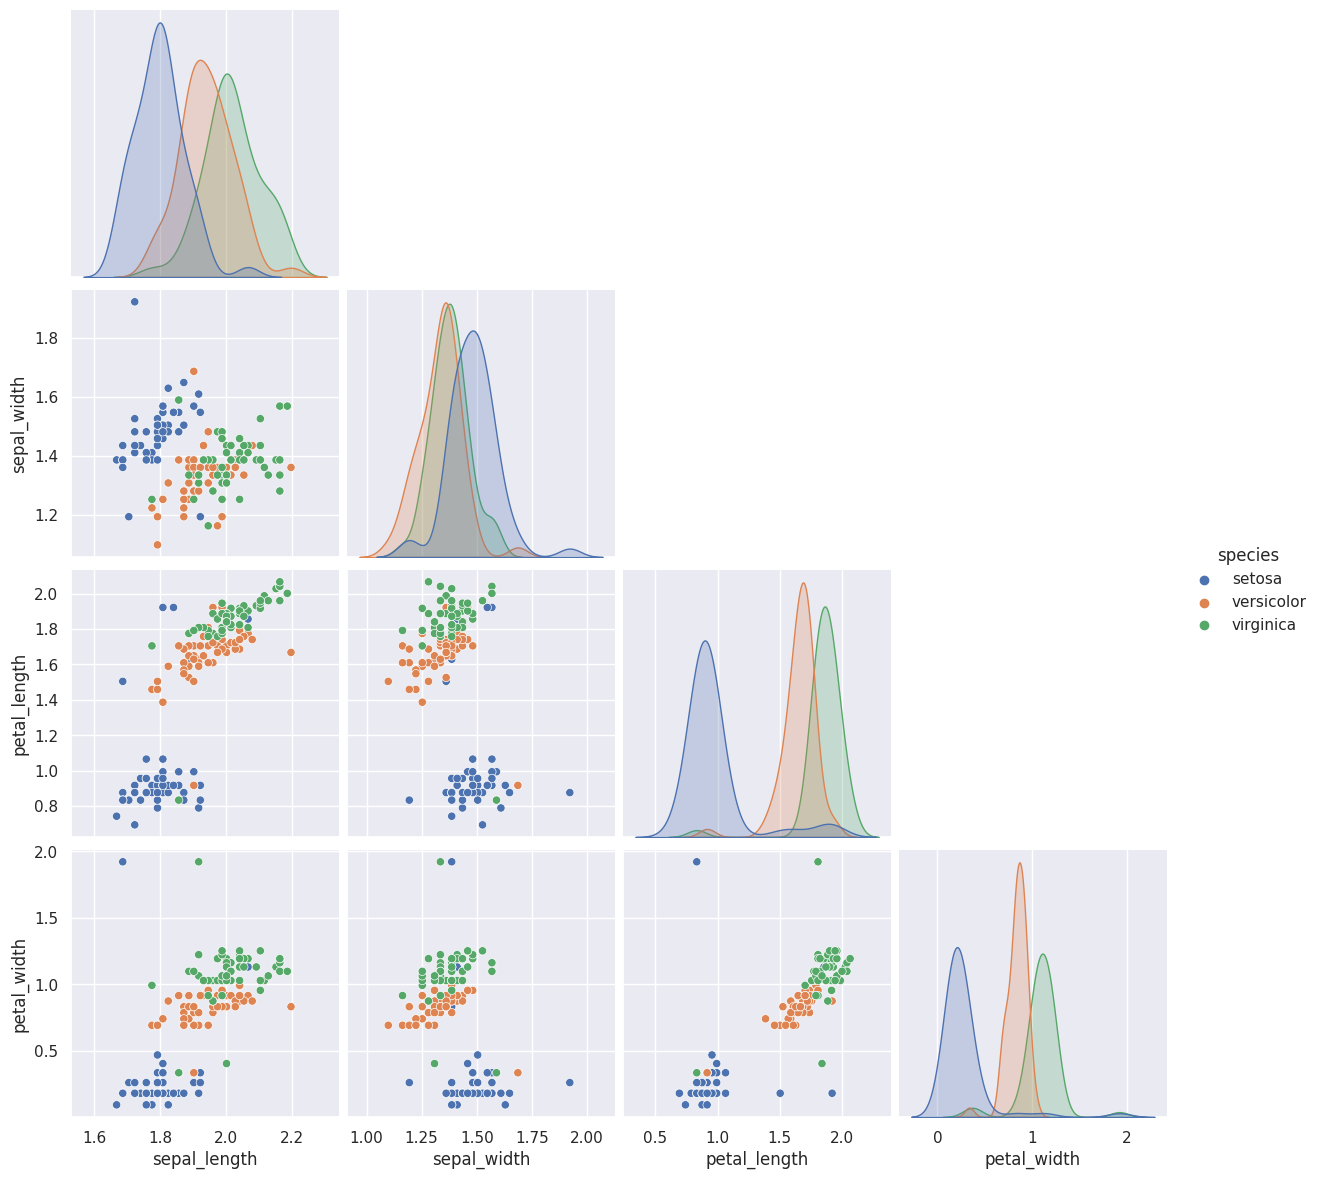

In [151]:
# seaborn pairplot and multivariate analysis
sns.pairplot(
    data = df
    , hue = "species"
    , height = 3
    , corner = True
)
plt.show()

**Difference between One-Hot Encoding and Label Encoding**
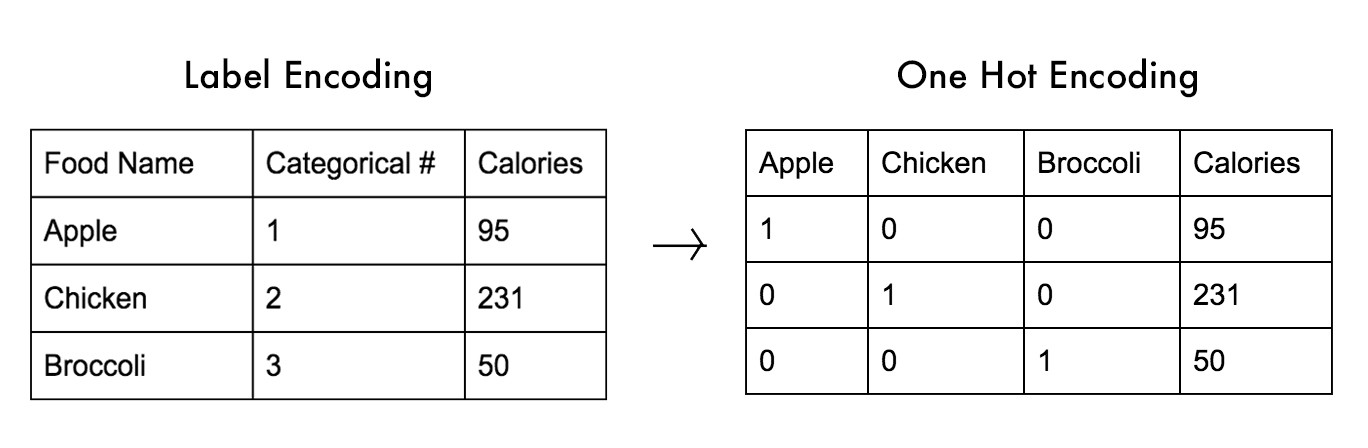

In [152]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [153]:
labenc= LabelEncoder()
data["species"] = labenc.fit_transform(data["species"])

In [154]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
84,1.887070,1.252763,1.589235,0.741937,1
110,1.921927,1.360977,1.704748,0.916291,1
155,1.987874,1.252763,1.791759,1.064711,2
0,1.808289,1.504077,0.875469,0.182322,0
33,1.871802,1.648659,0.875469,0.182322,0


In [155]:
#Train-test splits

from sklearn.model_selection import train_test_split

target = 'species'
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
# it shows 80% of data is split for training and 20% of the data goes to testing.
print(X_train.shape)
print(X_test.shape)

(122, 4)
(31, 4)
